In [3]:
import numpy as np
import pandas as pd
import pickle
from scipy import integrate, signal
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from toy_models import *
%matplotlib widget

## f_XY_4eq does not consider the dynamic of Js

In [14]:
theta0 = np.radians(40)
Jmax = 1
J12 = 50

# FAR TARGETS

res_ksmall = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_ksmall = [J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 5000)

for _ in range(15):
    x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0)]
    res_ksmall.append(integrate.solve_ivp(lambda t, x: f_XY_4eq(x, t, params_ksmall), [t[0], t[-1]], x0, t_eval=None, method='DOP853'))

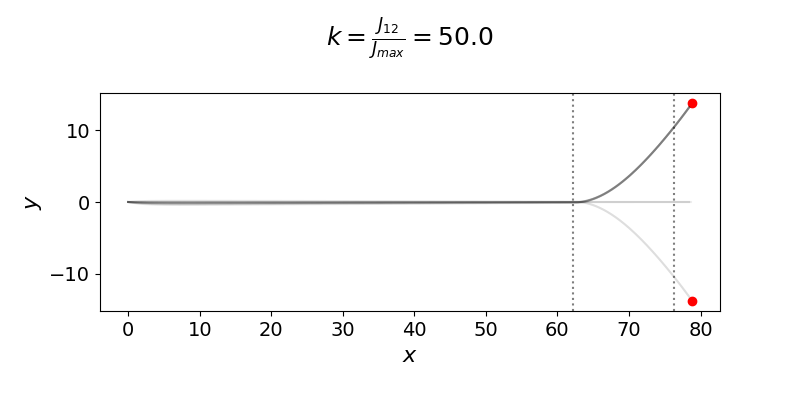

In [15]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_ksmall:
    plot_traj_ax(r, params_ksmall, ax, len(res_ksmall))

ax.scatter(params_ksmall[3], params_ksmall[4], c='r')
ax.scatter(params_ksmall[3], -params_ksmall[4], c='r')
ax.axvline(params_ksmall[3]-params_ksmall[4]/np.tan(params_ksmall[2]), c='black', ls=':', alpha=0.5)
ax.axvline(params_ksmall[3]-params_ksmall[4]/np.tan(2*params_ksmall[2]), c='black', ls=':', alpha=0.5)
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_ksmall[0]/params_ksmall[1]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [4]:
theta0 = np.radians(20)
Jmax = 1
J12 = 500

# FAR TARGETS

res_kbig = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_kbig = [J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 5000)

for _ in range(15):
    x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0)]
    res_kbig.append(integrate.solve_ivp(lambda t, x: f_XY_4eq(x, t, params_kbig), [t[0], t[-1]], x0, t_eval=None, method='DOP853'))

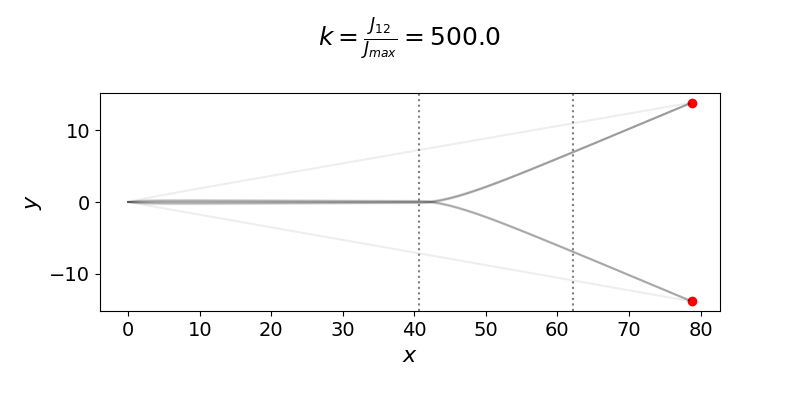

In [5]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_kbig:
    plot_traj_ax(r, params_kbig, ax, len(res_kbig))

ax.scatter(params_kbig[3], params_kbig[4], c='r')
ax.scatter(params_kbig[3], -params_kbig[4], c='r')
ax.axvline(params_kbig[3]-params_kbig[4]/np.tan(params_kbig[2]), c='black', ls=':', alpha=0.5)
ax.axvline(params_kbig[3]-params_kbig[4]/np.tan(2*params_kbig[2]), c='black', ls=':', alpha=0.5)
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_kbig[0]/params_kbig[1]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

## OBS:
- increasing J12 decrease the number of trajectories that stay in the compromise.



---
---
---
---
---
---
---
---
---
# f_XY does consider the dynamic of Js

### CASE K SMALL (J12/Jmax << 1)

In [12]:
theta0 = np.radians(20)
Jmax = 1
J12 = 50

res_J_ksmall = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_J_ksmall = [1000, 1000, J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 1000)

x0 = [0, 0, 0, 0, 1, 1]
res_J_ksmall.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_J_ksmall), [t[0], t[-1]], x0, t_eval=t))
# for _ in range(15):
#     x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0), 1, 1]
#     res_J_ksmall.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_J_ksmall), [t[0], t[-1]], x0, t_eval=t))


In [7]:
# Save the results to a pickle file
with open('kbig.pkl', 'rb') as f:
    params_J_ksmall, res_J_ksmall = pickle.load(f)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_J_ksmall:
    plot_traj_ax(r, params_J_ksmall, ax, len(res_J_ksmall))

ax.scatter(params_J_ksmall[5], params_J_ksmall[6], c='r')
ax.scatter(params_J_ksmall[5], -params_J_ksmall[6], c='r')
ax.axvline(params_J_ksmall[5]-params_J_ksmall[6]/np.tan(2*params_J_ksmall[4]), c='black', ls='--')
ax.axvline(params_J_ksmall[5]-params_J_ksmall[6]/np.tan(params_J_ksmall[4]), c='black', ls='--')
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_J_ksmall[2]/params_J_ksmall[3]) + '\n', fontsize=18)
ax.set_aspect('equal', 'box')
plt.show()

EOFError: Ran out of input

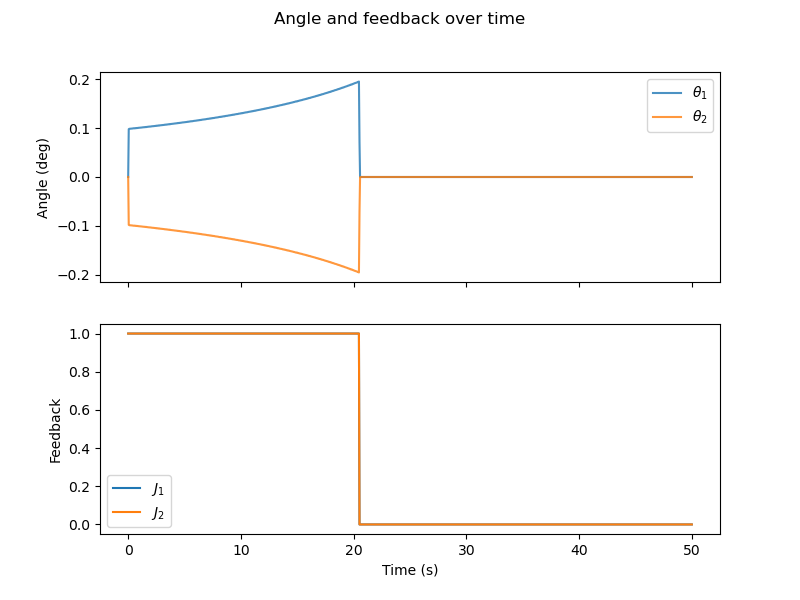

In [14]:
plot_thetasJs(res_J_ksmall[0])

### CASE K BIG (J12/Jmax >> 1)

In [10]:
theta0 = np.radians(20)
Jmax = 1
J12 = 500

res_J_kbig = []

#parameters (alpha, beta, J12, Jmax, theta0, xt, yt)
params_J_kbig = [1000, 1000, J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 1000)

for _ in range(15):
    x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0), 1, 1]
    res_J_kbig.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_J_kbig), [t[0], t[-1]], x0, t_eval=t))


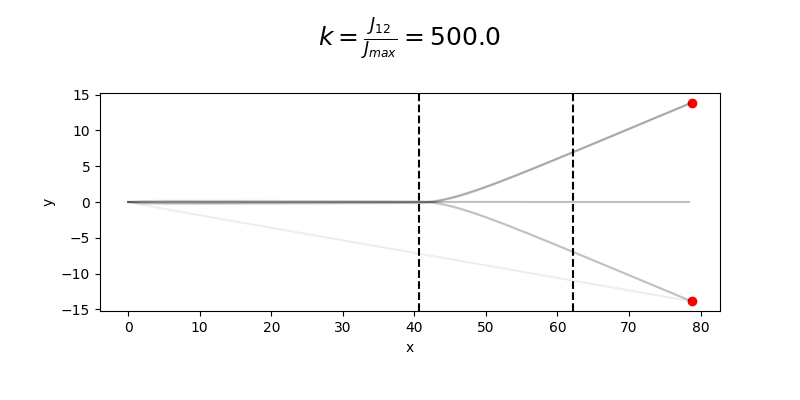

In [11]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_J_kbig:
    plot_traj_ax(r, params_J_kbig, ax, len(res_J_kbig))

ax.scatter(params_J_kbig[5], params_J_kbig[6], c='r')
ax.scatter(params_J_kbig[5], -params_J_kbig[6], c='r')
ax.axvline(params_J_kbig[5]-params_J_kbig[6]/np.tan(2*params_J_kbig[4]), c='black', ls='--')
ax.axvline(params_J_kbig[5]-params_J_kbig[6]/np.tan(params_J_kbig[4]), c='black', ls='--')
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_J_kbig[2]/params_J_kbig[3]) + '\n', fontsize=18)
ax.set_aspect('equal', 'box')
plt.show()

Some comments:

Evolving the system time dependent, when the system starts from far (i.e. small omega at t=0) the Js go to zero. In this case when $\theta_1=\theta_2$ the system is in a "minimum" of potential and it doesn't move

In [34]:
theta0 = np.radians(20)
Jmax = 1
J12 = 500

# FAR TARGETS

res_noise = []

#parameters (J12, Jmax, theta0, xt, yt, gamma, T)
params_noise = [J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10)), 100, 1e-6]

#time points
t = np.linspace(0, 50, 5000)

for _ in range(5):
    print(_)
    x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0)]
    res_noise.append(integrate.solve_ivp(lambda t, x: f_XY_4eq_noise(x, t, params_noise), [t[0], t[-1]], x0, t_eval=None, method='BDF'))

0


1


KeyboardInterrupt: 

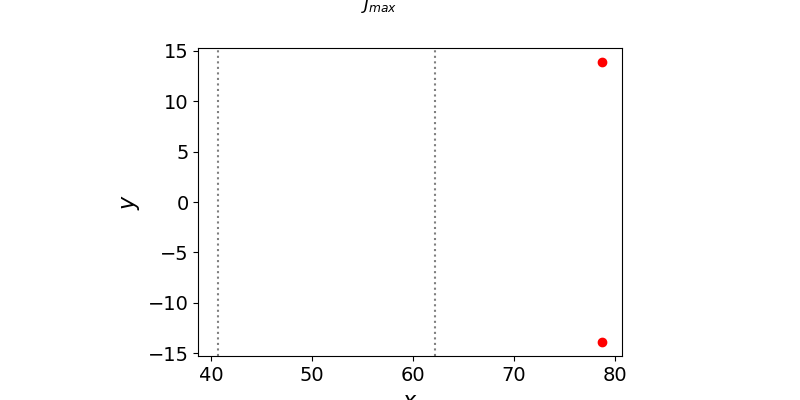

In [33]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_noise:
    plot_traj_ax(r, params_noise, ax, len(res_noise))

ax.scatter(params_noise[3], params_noise[4], c='r')
ax.scatter(params_noise[3], -params_noise[4], c='r')
ax.axvline(params_noise[3]-params_noise[4]/np.tan(params_noise[2]), c='black', ls=':', alpha=0.5)
ax.axvline(params_noise[3]-params_noise[4]/np.tan(2*params_noise[2]), c='black', ls=':', alpha=0.5)
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_noise[0]/params_noise[1]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

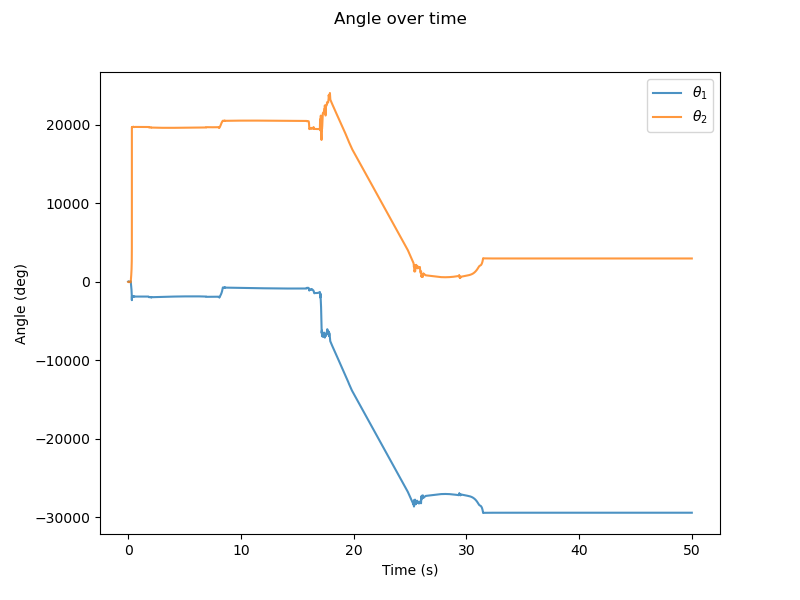

In [27]:
plot_thetas(res_noise[0])